# **¡Querido estudiante!**

Antes de comenzar a realizar este ejercicio, crea una copia y colócale tu nombre. Esto para que luego compartas el link en el aula y el profesor pueda identificar fácilmente a quién pertenece la actividad resuelta.

**Bienvenido (a) a este proceso de aprendizaje**

1. A partir de la lista L1=['abc', 123, [456, 'd', 'e', 'f', [7, 8, 9],['g','h','i']], 10, 'j', 'k'], llegar a L2=[['abc', 456, 7], 'def', [8, 9], 'g', 'h', [10, 'j', 'k']] usando métodos de indexación.


In [1]:
L1 = ['abc', 123, [456, 'd', 'e', 'f', [7, 8, 9],['g','h','i']], 10, 'j', 'k']  # Creacion de lista de acuerdo a las instrucciones
print(L1)
L2 = [[L1[0], L1[2][0], L1[2][4][0]], L1[2][1]+L1[2][2]+L1[2][3], [L1[2][4][1], L1[2][4][2]], L1[2][5][0], L1[2][5][1], [L1[3], L1[4], L1[5]]]
print(L2)

['abc', 123, [456, 'd', 'e', 'f', [7, 8, 9], ['g', 'h', 'i']], 10, 'j', 'k']
[['abc', 456, 7], 'def', [8, 9], 'g', 'h', [10, 'j', 'k']]


2. Usando el conjunto de datos de Wine (https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv), extrae lo siguiente de cada columna:

* Media
* Desviación estándar
* Rango
* Mediana

Luego, filtra el dataset siguiendo las siguientes instrucciones:
* D1= La primera y cuarta columnas
* D2= Las dos primeras y las dos últimas columnas

Finalmente, imprime para todas las columnas, todos los valores superiores a la media, más dos veces la desviación estándar e inferiores a la media, menos dos veces la desviación estándar.



In [10]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy

#Cargo el archivo
file_wine= 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv' # Cargar archivo fuente

wine=pd.read_csv(file_wine, encoding = 'UTF-8') # Lectura de archivo y cargarlo a la variable wine
print(wine.columns)

# caluculo estadistico, Media, Desviacoin, Rango, Mediana

statistics = wine.describe().T[['mean', 'std']]
statistics['range'] = wine.max() - wine.min()
statistics['median'] = wine.median()

print("Statistics for each column:")
print(statistics)

# Filtro de Datasets D1
D1 = wine.iloc[:, [0, 3]]
print("\nFiltrado dataset D1 (Primera y cuartas columns):")
print(D1)

# Filtro Dataset D2
D2 = wine.iloc[:, [0, 1, -2, -1]]
print("\nFiltrado dataset D2 (Dos primeras y dos ultimas columns):")
print(D2)

# Finalmente, imprime para todas las columnas, todos los valores superiores a la media, más dos veces la desviación estándar e inferiores a la media, menos dos veces la desviación estánda

for column in wine.columns:
    mean = statistics.loc[column, 'mean']
    std = statistics.loc[column, 'std']

    limite_superior = mean + 2 * std
    limite_inferior = mean - 2 * std

    valores_filtrados = wine[(wine[column] > limite_superior) | (wine[column] < limite_inferior)]

    print(f"\nValores en la columna '{column}' mayores que la media + 2*std o menos de la media - 2*std:")
    print(valores_filtrados[column].values)


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')
Statistics for each column:
                            mean         std    range   median
Wine                    1.938202    0.775035     2.00    2.000
Alcohol                13.000618    0.811827     3.80   13.050
Malic.acid              2.336348    1.117146     5.06    1.865
Ash                     2.366517    0.274344     1.87    2.360
Acl                    19.494944    3.339564    19.40   19.500
Mg                     99.741573   14.282484    92.00   98.000
Phenols                 2.295112    0.625851     2.90    2.355
Flavanoids              2.029270    0.998859     4.74    2.135
Nonflavanoid.phenols    0.361854    0.124453     0.53    0.340
Proanth                 1.590899    0.572359     3.17    1.555
Color.int               5.058090    2.318286    11.72    4.690
Hue                   

3. Crea una matriz NumPy de 100 filas por 5 columnas que conste de números enteros aleatorios del 1 al 100. (Ten en cuenta que en la parte superior, el límite puede ser exclusivo).

Convertir esta matriz en dataframe y cambiar el nombre de las columnas por ['f1', 'f2', 'f3', 'f4', 'etiqueta'].

En la columna etiqueta, cambiar cada número por su correspondiente posición en el alfabeto español. Por ejemplo, 25 vendría siendo la letra "x" (en un alfabeto incluyendo la "ñ"), si el número es mayor a 28 repetir el conteo de letras, ej: 35 sería la "g".

Finalmente, crear una nueva columna que lleve de nombre las iniciales de tu nombre, donde el contenido de las filas sea la suma de las filas de las cuatro primeras columnas.

In [9]:
import numpy as np # importando librerias
import pandas as pd # importando librerias

# Crear la matriz NumPy
matriz = np.random.randint(1, 101, size=(100, 5)) # 100 filas x 5 columnas con numros aleatorios
print(matriz) # ver creacion de columna

# Convertir matriz en un DataFrame
df = pd.DataFrame(matriz, columns=['f1', 'f2', 'f3', 'f4', 'etiqueta']) # invocamos pandas y creo la matriz renombrando las columnas
print (df)  # Veo la creacion del df

# Mapeo de números a letras del alfabeto español
letras = 'abcdefghijklmnñopqrstuvwxyz' # 27 letras del alfabeto incluyendo la ñ
mapeo = {i + 1: letra for i, letra in enumerate(letras)}

# Cambiar los números en la columna 'etiqueta' por letras
df['etiqueta'] = df['etiqueta'].map(lambda x: mapeo.get(x % 28, 'Valor fuera de rango'))

# Crear nueva Columna Sumar las primeras cuatro columnas
df['DAV'] = df[['f1', 'f2', 'f3', 'f4']].sum(axis=1)

# Mostrar el DataFrame
print(df)

[[ 37  66  28  75  60]
 [ 24  81  67  95   9]
 [ 53  86  52  73   7]
 [ 57  11  31  93  47]
 [ 65  97  88 100  49]
 [ 92  78  12  94  74]
 [ 39  98   8  80  91]
 [ 27   4  36  40  84]
 [  1  92  66  84  69]
 [ 51  34   7  10  18]
 [ 20  64  28  38  77]
 [ 12  89  10  22  65]
 [  1  20  83  71  11]
 [ 16  80  24  67  82]
 [ 29  74   7  78  26]
 [ 76  86  37  27  24]
 [ 76  31   6  71  26]
 [ 78  20  85  21   2]
 [ 61  11  25  51  38]
 [ 86  20  31  81  88]
 [ 15  42  33  36  77]
 [ 96  43  24  97  54]
 [ 11  57  64  62  40]
 [ 55  75  75  57  61]
 [ 43  47  98  35  74]
 [ 96  62  94  98  16]
 [ 28  89  91  57  69]
 [ 39  19   6  33  19]
 [ 10   7   6   6  11]
 [ 78  76   5   5  33]
 [ 54  80  65   4  69]
 [ 38  28  30  54  91]
 [ 44  27  59  53  83]
 [ 42  58  34  91  97]
 [ 52   7  52  97  87]
 [ 55  82  84   5  54]
 [  6  31   1  27  63]
 [ 56  85  95  35  65]
 [ 32  99  22  47   6]
 [ 86  58  94   7  44]
 [ 87  41  28  99  98]
 [ 10  89  20   9   1]
 [  7  18  42  37  45]
 [ 47  66  

4. De la base de datos Titanic (https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv), con las columnas Género ('Sex'), Edad ('Age') y el valor del tiquete ('Fare'), responde las siguientes preguntas:

* ¿Cuántos hombres y mujeres tenemos en nuestro dataset?
* ¿Cuál es la edad más frecuente en nuestro conjunto de datos?
* ¿Cuál es la edad más frecuente en las mujeres?
* ¿Cuál es la edad más frecuente en los hombres?
* ¿Cuál es el precio del tiquete más común?
* ¿El precio del tiquete más común es el mismo para hombres y para mujeres?
* ¿Cuánto pagan promedio hombres y mujeres por rango de edades? Proponer algunos rangos.



In [26]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy

#Cargo el archivo Titanic
file_titanic= 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' # Cargar archivo fuente

titanic=pd.read_csv(file_titanic, encoding = 'UTF-8') # Lectura de archivo y cargarlo a la variable wine
print(titanic.columns)

#¿Cuántos hombres y mujeres tenemos en nuestro dataset?

contador_genero = titanic['Sex'].value_counts()
print("Numero de hobres y mujeres en el Dataset:")
print(contador_genero)

#¿Cuál es la edad más frecuente en nuestro conjunto de datos?

edad_mas_frecuente = titanic['Age'].mode()[0] # usamos funcion mode para calcular la frecuencia de los datos

print("La edad mas frecuente en el dataset:")
print(edad_mas_frecuente)

#¿Cuál es la edad más frecuente en las mujeres?

edad_mas_frecuente_mujeres = titanic[titanic['Sex'] == 'female']['Age'].mode()[0]

print("La edad mas frecuente en las mujeres:")
print(edad_mas_frecuente_mujeres)

# ¿Cuál es la edad más frecuente en los hombres?

edad_mas_frecuente_hombres = titanic[titanic['Sex'] == 'male']['Age'].mode()[0]

print("La edad mas frecuente en los hombres:")
print(edad_mas_frecuente_hombres)

#¿Cuál es el precio del tiquete más común?

precio_mas_comun = titanic['Fare'].mode()[0]

print("El precio del tiquete mas comun:")
print(precio_mas_comun)

#¿El precio del tiquete más común es el mismo para hombres y para mujeres?

precio_mas_comun_hombres = titanic[titanic['Sex'] == 'male']['Fare'].mode()[0]
precio_mas_comun_mujeres = titanic[titanic['Sex'] == 'female']['Fare'].mode()[0]

print("El precio del tiquete mas comun para hombres:")
print(precio_mas_comun_hombres)

print("El precio del tiquete mas comun para mujeres:")
print(precio_mas_comun_mujeres)

# ¿Cuánto pagan promedio hombres y mujeres por rango de edades? Proponer algunos rangos.

bins = [0, 18, 30, 40, 50, 60, 80]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-80']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

# calcular el promedio por genero
prom_tarifa_genero_edad = titanic.groupby(['AgeGroup', 'Sex'])['Fare'].mean().unstack()

print("El promedio de tarifa genero y edad:")
print(prom_tarifa_genero_edad)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Numero de hobres y mujeres en el Dataset:
Sex
male      577
female    314
Name: count, dtype: int64
La edad mas frecuente en el dataset:
24.0
La edad mas frecuente en las mujeres:
24.0
La edad mas frecuente en los hombres:
19.0
El precio del tiquete mas comun:
8.05
El precio del tiquete mas comun para hombres:
8.05
El precio del tiquete mas comun para mujeres:
7.75
El promedio de tarifa genero y edad:
Sex          female       male
AgeGroup                      
0-18      36.765626  28.416023
19-30     40.002963  20.757659
31-40     62.090529  31.719164
41-50     56.868823  32.310911
51-60     69.522321  32.401043
61-80     55.848600  39.085311


<ipython-input-26-9b6d08918fbb>:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prom_tarifa_genero_edad = titanic.groupby(['AgeGroup', 'Sex'])['Fare'].mean().unstack()


5. De la base de datos de producción de leche mensual (https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv), realizar lo siguiente:

* ¿Cuál es la producción de leche anual?
* ¿Cuál es la producción de leche en los meses de enero, julio y diciembre?
* Realizar un gráfico de la producción anual con su media.

In [44]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy

#Cargo el archivo Leche
file_leche= 'https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv' # Cargar archivo fuente

leche=pd.read_csv(file_leche, encoding = 'UTF-8') # Lectura de archivo y cargarlo a la variable wine
print(leche.columns)

#¿Cuál es la producción de leche anual?

leche['Month'] = pd.to_datetime(leche['Month'])
leche['Year'] = leche['Month'].dt.year
agrupado = leche.groupby(leche['Month'].dt.year)['Monthly milk production (pounds per cow)'].sum()

print("la produccion leche anual es:")
print(agrupado)

#¿Cuál es la producción de leche en los meses de enero, julio y diciembre?

# Filtra los meses de enero, julio y diciembre
meses_seleccionados = leche[leche['Month'].dt.month.isin([1, 7, 12])] #  filtrar las filas correspondientes a enero (mes 1), julio (mes 7) y diciembre (mes 12).
agrupando2 = meses_seleccionados.groupby(meses_seleccionados['Month'].dt.month)['Monthly milk production (pounds per cow)'].sum()

print("la produccion leche en los meses de enero, julio y diciembre es:")
print(agrupando2) # Agrupando todos los eneros, Julios y Diciembres
# Muestra la producción de leche para los meses seleccionados
print(meses_seleccionados)






Index(['Month', 'Monthly milk production (pounds per cow)'], dtype='object')
la produccion leche anual es:
Month
1962     7389
1963     7560
1964     7905
1965     8077
1966     8505
1967     8795
1968     8986
1969     9167
1970     9384
1971    10009
1972    10250
1973    10111
1974    10301
1975    10352
Name: Monthly milk production (pounds per cow), dtype: int64
la produccion leche en los meses de enero, julio y diciembre es:
Month
1     10179
7     11033
12    10094
Name: Monthly milk production (pounds per cow), dtype: int64
         Month  Monthly milk production (pounds per cow)  Year
0   1962-01-01                                       589  1962
6   1962-07-01                                       640  1962
11  1962-12-01                                       582  1962
12  1963-01-01                                       600  1963
18  1963-07-01                                       660  1963
23  1963-12-01                                       598  1963
24  1964-01-01       

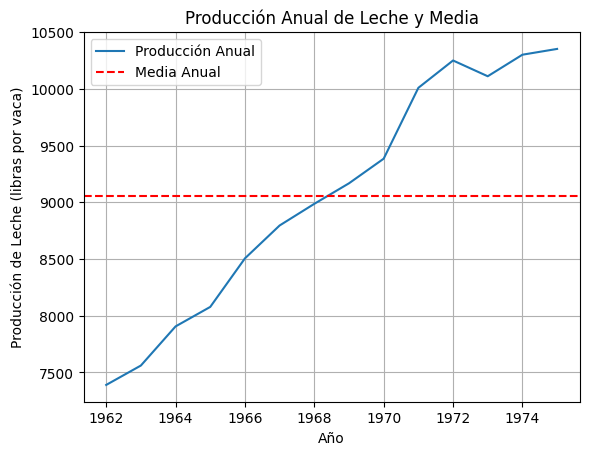

In [46]:
# Realizar un gráfico de la producción anual con su media.
# -------- iniciando el ejercicio ---------

import pandas as pd
import matplotlib.pyplot as plt

#Cargo el archivo Leche
file_leche= 'https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv' # Cargar archivo fuente

leche=pd.read_csv(file_leche, encoding = 'UTF-8') # Lectura de archivo y cargarlo a la variable wine


# Convierte la columna 'Month' a datetime
leche['Month'] = pd.to_datetime(leche['Month'], format='%Y-%m')

# Agrupa por año y calcula la suma de la producción
produccion_anual = leche.groupby(leche['Month'].dt.year)['Monthly milk production (pounds per cow)'].sum()

# Calcula la media de la producción anual
media_anual = produccion_anual.mean()

# Crea el gráfico
plt.plot(produccion_anual.index, produccion_anual.values, label='Producción Anual')
plt.axhline(y=media_anual, color='r', linestyle='--', label='Media Anual')

# Configura el gráfico
plt.xlabel('Año')
plt.ylabel('Producción de Leche (libras por vaca)')
plt.title('Producción Anual de Leche y Media')
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()